# Examples

In this tutorial, you will use both adaboost and gradient boosted trees to make a prediction, and learn how to display how your error rate evolves as you train your model.

For these practice examples, we will use both algorithms for regression, and for a change of pace, we will create a random dataset rather than use one. Don't worry, the challenges will use real datasets.

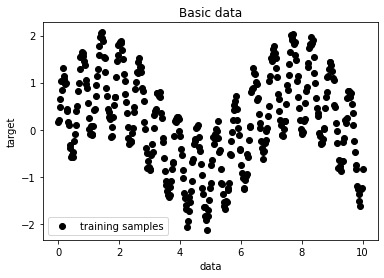

In [1]:
# Create the dataset

import numpy as np
import matplotlib.pyplot as plt

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 10, 400)[:, np.newaxis] # This will be our independent variable
y = np.sin(X).ravel() + np.sin(10 * X).ravel() + rng.normal(0, 0.1, X.shape[0]) # This will be our dependent variable, as you can see X is part of the equation, but we add some randomness to it

# Let's visualize what the data looks like
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()


Let's create a simple tree to predict our target first, we are hoping that the adaboost and gradient boost approaches will be better than a single tree.

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a decision tree classifier, we will set its max_depth to 4
# What happens if you decrease this parameter? if you increase it? 
# What happens if you remove it altogether?
tree = DecisionTreeRegressor(max_depth=4)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(X)

Let's show the results of our tree's predictions on the plt

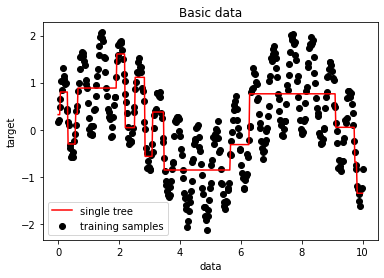

In [3]:
# Let's visualize what the data looks like
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()


As expected, the tree is not a particularly great fit. See how changing the depth of the tree affects the graph above. 

Let's transition to Adaboost. Below we create an adaboost regressor, fit it, then plot its prediction on a similar graph as above

In [11]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_tree))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_tree)))


Mean Absolute Error: 0.5002803949306048
Mean Squared Error: 0.36185982539536615
Root Mean Squared Error: 0.6015478579426297


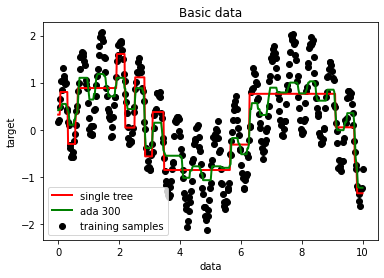

In [4]:
from sklearn.ensemble import AdaBoostRegressor

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)

# 
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree", linewidth=2)
plt.plot(X, y_pred_ada, c="g", label="ada 300", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()




Ada boost gives us a better fit in some cases, but not all. Tweak the depth and number of trees and observe how it influences our graph.

Let's now transition to gradient boosting. Similarly we create 


In [10]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_ada)))


Mean Absolute Error: 0.4396772518183646
Mean Squared Error: 0.26674948634699464
Root Mean Squared Error: 0.5164779630797375


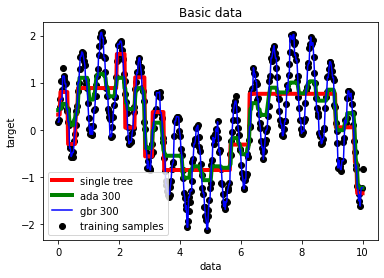

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.9, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)

plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree", linewidth=4)
plt.plot(X, y_pred_ada, c="g", label="ada 300", linewidth=4)
plt.plot(X, y_pred_gbr, c="b", label="gbr 300")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()


In [15]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_gbr)))


Mean Absolute Error: 0.0377677206775972
Mean Squared Error: 0.010003679968794019
Root Mean Squared Error: 0.1000183981515102


Before you move forward, **pause!**

Play around with the parameters to the various models we've created. Modify a parameter, make a prediction on its impact on the graph, then see if it is correct.

For example: 
- What happens if I change the learning rate from 0.1 to 0.7?
- I think the blue graph will be a closer fit to the data
- Re run and see if it is the case.

Do this for the various models, tweaking as many of the parameters as you can. If your predictions don't pan out, involve your peers or your TMs and get support.

Let's plot another important graph: The error progression as we train our gradient boosted trees.

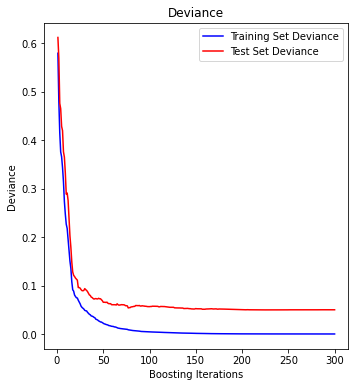

In [16]:
# Credit to this example from sklearn: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
# the train_score_ variable is a list that records the deviance of the model for any given number of trees. gbr.train_score_[0] is the deviance when we only had the initial tree, whereas
# gbr.train_score_[100] is the deviance by the time we have created 100 trees.
# This is plotted against a simple list that goes from 1 to our target number of trees.
plt.plot(np.arange(target_number_of_trees) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')

# We also want to see how well we could handle the test set each time. 
# The staged_predict function takes an X, and returns a list of the predictions for X at various stages of the training: What did we pick when we had 1 tree, 2 trees, 3 trees, etc.
# We will compare our predictions at each stage against the test data, and compute the deviance
test_score = np.zeros((target_number_of_trees,), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
    test_score[i] = gbr.loss_(y_test, y_pred)
    
plt.plot(np.arange(target_number_of_trees) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()


Again, play with the various parameters to our gradient boosted tree and see how it impacts this graph: How does the depth of the tree influence it? the number of trees? the learning rate? 

Time for some challenges!

# Challenge

The following [dataset](https://docs.google.com/spreadsheets/d/1a-hCKt0KrtP4CjUfhsIMJRkbiT9LyzhiF9xSLFie5XE/edit?usp=sharing) contains information on contraceptive use by women in Indonesia. The variable we are trying to predict is the *contraceptive_used* variable which is categorical (1 indicates no use, 2 indicates long-term methods, 3 indicates short term methods)

The *age* and *number_of_children_born* variables are continuous, all other variables in the dataset are categorical.

This time, you will have to use a [gradient boosted classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier). 

Tips:

*   Set up your plot for deviance, and use it as a guideline for tweaking your model. What learning rate did you try? What tree depth? What number of trees?
*   Display the most relevant variables that influence prediction. The approach for this is similar to what we've shown in the random forest example.
*   Talking about random forests, train a random forest model to make the same prediction. Compare and contrast both models: Which one do you trust more?
*   Train an [adaboost classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier), and compare it to the above 2 models.


In [28]:
import pandas as pd


from sklearn import ensemble
from sklearn import linear_model

# make sure to download the dataset and add it to your collab first!
data = pd.read_csv('cmc.csv')
data.describe()

,age,education,husband_education,number_of_children_born,muslim,employed,husband_occupation,lifestyle,media_exposure,contraceptive_used
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [29]:
# Preview the head
#
data.head()

,age,education,husband_education,number_of_children_born,muslim,employed,husband_occupation,lifestyle,media_exposure,contraceptive_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1473 non-null   int64
 1   education                1473 non-null   int64
 2   husband_education        1473 non-null   int64
 3   number_of_children_born  1473 non-null   int64
 4   muslim                   1473 non-null   int64
 5   employed                 1473 non-null   int64
 6   husband_occupation       1473 non-null   int64
 7   lifestyle                1473 non-null   int64
 8   media_exposure           1473 non-null   int64
 9   contraceptive_used       1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [31]:
data.columns

Index(['age', 'education', 'husband_education', 'number_of_children_born',
       'muslim', 'employed', 'husband_occupation', 'lifestyle',
       'media_exposure', 'contraceptive_used'],
      dtype='object')

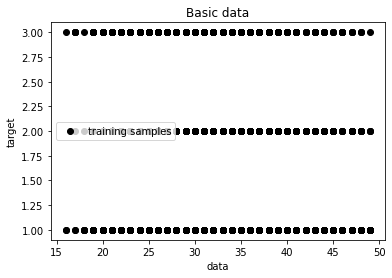

In [42]:
X = np.array(data['age'].values.reshape(-1,1))
y = np.array(data['contraceptive_used'])

# Let's visualize what the data looks like
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()


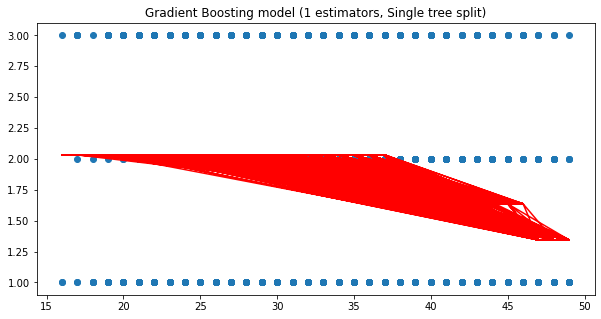

In [55]:
params = {
    'n_estimators': 1,
    'max_depth': 2,
    'learning_rate': 1,
    'criterion': 'mse'
}

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

gradient_boosting_regressor.fit(X, y)

plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(X, y)
plt.plot(X, gradient_boosting_regressor.predict(X), color='r')
plt.show()

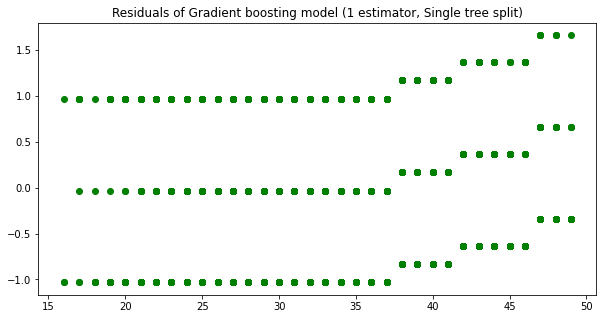

In [56]:
plt.figure(figsize=(10, 5))
plt.title('Residuals of Gradient boosting model (1 estimator, Single tree split)')
plt.scatter(X, y - gradient_boosting_regressor.predict(X), color='green')
plt.show()

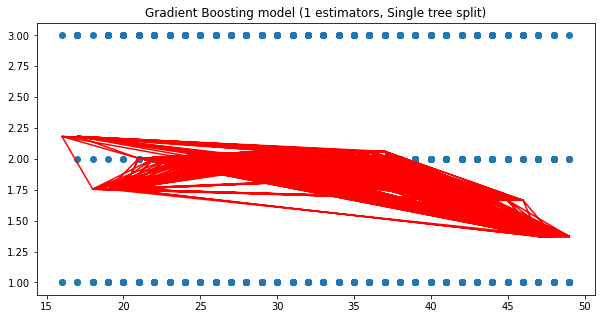

In [57]:
params['n_estimators'] = 2

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

gradient_boosting_regressor.fit(X, y)

plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(X, y)
plt.plot(X, gradient_boosting_regressor.predict(X), color='r')
plt.show()